<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import sklearn as sk


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples = 1000)

In [ ]:
data = pd.DataFrame(data = {'variable1' : X[:,0], 'variable2': X[:,1], 'label': y})

In [ ]:
data

,variable1,variable2,label
0,-0.616411,0.509939,1
1,0.711536,-0.702650,0
2,0.236499,-0.971632,0
3,-0.680796,0.420140,1
4,0.954865,-0.297042,0
...,...,...,...
995,0.309017,0.951057,0
996,0.876307,-0.481754,0
997,-0.331500,0.728085,1
998,0.459580,-0.888136,0


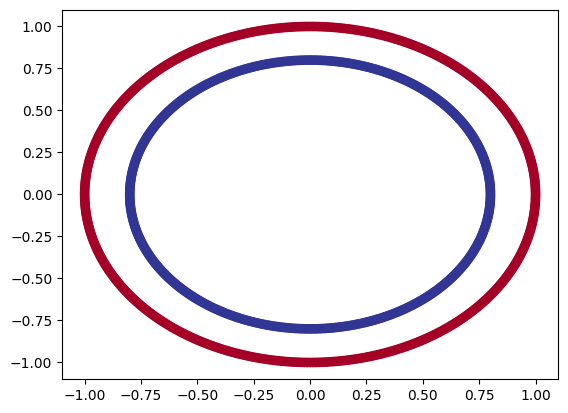

In [ ]:
plt.scatter(data['variable1'],data['variable2'],c = y,cmap=plt.cm.RdYlBu)

In [ ]:
y_tes = data['label']

In [ ]:
import torch
y_tes = y_tes.to_numpy()

In [ ]:
y_tes = torch.from_numpy(y_tes)

In [ ]:
data = data.drop('label',axis = 1)

In [ ]:
X_tes = data.to_numpy()

In [ ]:
X_tes = torch.from_numpy(X_tes)

In [ ]:
X_tes.shape

torch.Size([1000, 2])

In [ ]:
X_tes = torch.tensor(X_tes, dtype = torch.float32)
y_tes = torch.tensor(y_tes,dtype = torch.float32)

<ipython-input-14-d48ba99c0cde>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tes = torch.tensor(X_tes, dtype = torch.float32)
<ipython-input-14-d48ba99c0cde>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tes = torch.tensor(y_tes,dtype = torch.float32)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tes, y_tes)


# **Build a Pytorch Model**

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
import torch.nn as nn

In [ ]:
class MakeCircles(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 8)
    self.layer2 = nn.Linear(8,1)
  def forward(self, x):
    return self.layer2(self.layer1(x))



In [ ]:
model0 = MakeCircles().to(device)
model0

MakeCircles(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=1, bias=True)
)

# **Make predictions using random weights of the model**

In [ ]:
X_test[:10]

tensor([[-0.6352, -0.4863],
        [ 0.3223,  0.7322],
        [ 0.7999, -0.0101],
        [-0.2851,  0.7475],
        [-0.1502, -0.9887],
        [-0.3766,  0.7058],
        [-0.1004,  0.9950],
        [-0.7969, -0.0703],
        [ 0.9773, -0.2120],
        [-0.7977,  0.0603]])

In [ ]:
y_pred = model0(X_test)
y_pred[:10].squeeze()

tensor([0.5241, 0.3081, 0.2593, 0.4107, 0.4635, 0.4281, 0.3685, 0.5334, 0.2380,
        0.5279], grad_fn=<SqueezeBackward0>)

In [ ]:
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model0.parameters(), lr = 0.1)

In [ ]:
y_logits = model0(X_test).squeeze()
y_pred = torch.round(torch.sigmoid(y_logits))

y_logits[:10], y_pred[:10]

(tensor([0.5241, 0.3081, 0.2593, 0.4107, 0.4635, 0.4281, 0.3685, 0.5334, 0.2380,
         0.5279], grad_fn=<SliceBackward0>),
 tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SliceBackward0>))

In [ ]:
epochs = 100

In [ ]:
def accuracy(y_true, y_pred):
  count = torch.eq(y_true, y_pred).sum().item()
  return count/len(y_pred)

In [ ]:
for epoch in range(epochs):

  # set the model into training mode
  model0.train()

  # Forward pass
  train_logits = model0(X_train).squeeze()

  # convert Logits into predictions
  train_preds = torch.round(torch.sigmoid(train_logits))

  # calculate the loss
  train_loss = loss(train_logits, y_train)

  # zero grad
  optimizer.zero_grad()

  # train loss back propagation
  train_loss.backward()

  # update parameters with optimizer
  optimizer.step()

  # train accuracy
  train_accuracy = accuracy(y_train, train_preds)

  ## Testing loop

  model0.eval()
  with torch.inference_mode():
    test_logits = model0(X_test).squeeze()
    # conver the logits into predictions
    test_preds = torch.round(torch.sigmoid(test_logits))

    # loss calculation
    test_loss = loss(test_logits,y_test)

    test_accuracy = accuracy(y_test, test_preds)
  if epoch % 10 == 0:
    print(f'for {epoch} epoch, training loss : {train_loss:.2f}, training accuracy: {train_accuracy: .2f}')
    print(f'for {epoch} epoch, testing loss : {test_loss: .2f}, testing accuracy: {test_accuracy: .2f}')
    print('\n')





for 0 epoch, training loss : 0.72, training accuracy:  0.49
for 0 epoch, testing loss :  0.71, testing accuracy:  0.45


for 10 epoch, training loss : 0.69, training accuracy:  0.56
for 10 epoch, testing loss :  0.69, testing accuracy:  0.46


for 20 epoch, training loss : 0.69, training accuracy:  0.49
for 20 epoch, testing loss :  0.70, testing accuracy:  0.46


for 30 epoch, training loss : 0.69, training accuracy:  0.51
for 30 epoch, testing loss :  0.70, testing accuracy:  0.47


for 40 epoch, training loss : 0.69, training accuracy:  0.50
for 40 epoch, testing loss :  0.70, testing accuracy:  0.46


for 50 epoch, training loss : 0.69, training accuracy:  0.49
for 50 epoch, testing loss :  0.70, testing accuracy:  0.46


for 60 epoch, training loss : 0.69, training accuracy:  0.48
for 60 epoch, testing loss :  0.70, testing accuracy:  0.46


for 70 epoch, training loss : 0.69, training accuracy:  0.49
for 70 epoch, testing loss :  0.70, testing accuracy:  0.44


for 80 epoch, trai

**Plot the graphs and see what is going wrong**

In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('the file already exists')
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(750, 750, 250, 250)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([750, 2]),
 torch.Size([750]),
 torch.Size([250, 2]),
 torch.Size([250]))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

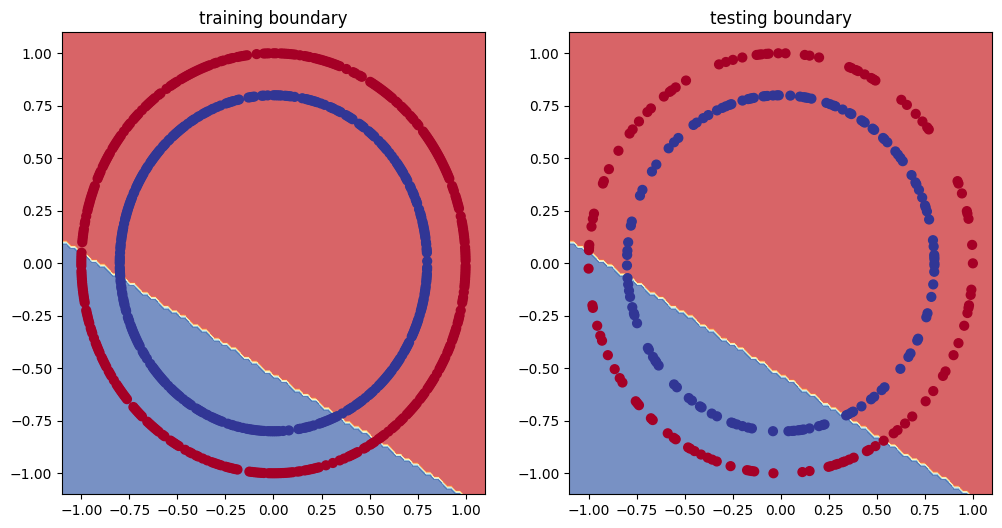

In [ ]:

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('training boundary')
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('testing boundary')
plot_decision_boundary(model0, X_test, y_test)


In [ ]:
class CircleModelv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 16)
    self.layer2 = nn.Linear(16, 32)
    self.layer3 = nn.Linear(32, 1)

  def forward(self, x):
    z = self.layer1(x)
    z = self.layer2(z)
    z = self.layer3(z)
    # print(z.shape)
    return z

In [ ]:
model1 = CircleModelv1().to(device)
model1

CircleModelv1(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
)

In [ ]:
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model1.parameters(), lr = 0.1)

In [ ]:
y_train.shape

torch.Size([750])

In [ ]:
epochs = 1000
for epoch in range(epochs):

  # set model to training mode
  model1.train()

  # forward pass and get the predictions
  train_logits = model1(X_train).squeeze()
  # print(train_logits.shape)
  # print(y_train.shape)
  # get the proper predictions from the logits
  train_preds = torch.round(torch.sigmoid(train_logits))

  # calculate the loss
  train_loss = loss(train_logits, y_train)

  # make optim grad zero
  optimizer.zero_grad()

  # backpropagation
  train_loss.backward()

  #apply the optimizer
  optimizer.step()

  # calculate train accuracy
  train_acc = accuracy(y_train, train_preds)

  ### Testing loop

  model1.eval()
  with torch.inference_mode():
    test_logs = model1(X_test).squeeze()

    # turn logs into preds
    test_preds = torch.round(torch.sigmoid(test_logs))

    # calculate the loss
    test_loss = loss(test_logs, y_test)

    # calculate the test accuracy
    test_acc = accuracy(y_test, test_preds)
  if epoch % 100 == 0:
    print(f'for {epoch} epoch train_acc:{train_acc}, train_loss:{train_loss}')
    print(f'test_acc:{test_acc}, test_loss:{test_loss}')
    print('\n')






for 0 epoch train_acc:0.552, train_loss:0.6972765326499939
test_acc:0.468, test_loss:1.1177284717559814


for 100 epoch train_acc:0.492, train_loss:0.6924937963485718
test_acc:0.452, test_loss:0.6977718472480774


for 200 epoch train_acc:0.488, train_loss:0.6924929022789001
test_acc:0.448, test_loss:0.6977835893630981


for 300 epoch train_acc:0.488, train_loss:0.6924929022789001
test_acc:0.448, test_loss:0.6977892518043518


for 400 epoch train_acc:0.488, train_loss:0.6924929022789001
test_acc:0.448, test_loss:0.6978163719177246


for 500 epoch train_acc:0.488, train_loss:0.6924929022789001
test_acc:0.448, test_loss:0.6977843046188354


for 600 epoch train_acc:0.488, train_loss:0.6924929022789001
test_acc:0.448, test_loss:0.6977843046188354


for 700 epoch train_acc:0.488, train_loss:0.6924929022789001
test_acc:0.448, test_loss:0.6977843046188354


for 800 epoch train_acc:0.488, train_loss:0.6924929022789001
test_acc:0.448, test_loss:0.6977843046188354


for 900 epoch train_acc:0.488,

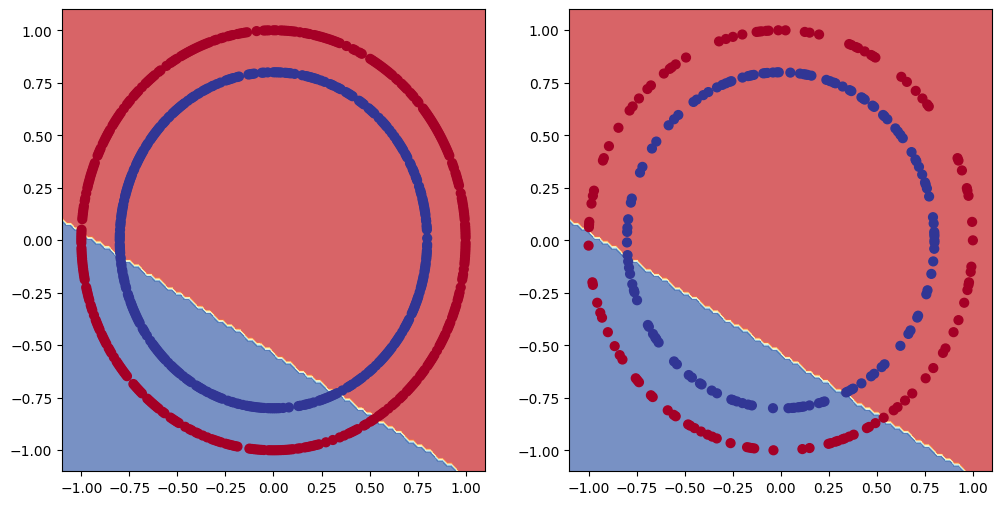

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model1, X_test, y_test)

**Create a linear Dataset and check weather the model is working or not**

In [ ]:

w = 0.7
b = 0.3
step_size = 0.01
X_regression = torch.arange(0,1,step_size)
X_regression

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900])

In [ ]:
y_regression = w * X_regression + b

In [ ]:
y_regression

tensor([0.3000, 0.3070, 0.3140, 0.3210, 0.3280, 0.3350, 0.3420, 0.3490, 0.3560,
        0.3630, 0.3700, 0.3770, 0.3840, 0.3910, 0.3980, 0.4050, 0.4120, 0.4190,
        0.4260, 0.4330, 0.4400, 0.4470, 0.4540, 0.4610, 0.4680, 0.4750, 0.4820,
        0.4890, 0.4960, 0.5030, 0.5100, 0.5170, 0.5240, 0.5310, 0.5380, 0.5450,
        0.5520, 0.5590, 0.5660, 0.5730, 0.5800, 0.5870, 0.5940, 0.6010, 0.6080,
        0.6150, 0.6220, 0.6290, 0.6360, 0.6430, 0.6500, 0.6570, 0.6640, 0.6710,
        0.6780, 0.6850, 0.6920, 0.6990, 0.7060, 0.7130, 0.7200, 0.7270, 0.7340,
        0.7410, 0.7480, 0.7550, 0.7620, 0.7690, 0.7760, 0.7830, 0.7900, 0.7970,
        0.8040, 0.8110, 0.8180, 0.8250, 0.8320, 0.8390, 0.8460, 0.8530, 0.8600,
        0.8670, 0.8740, 0.8810, 0.8880, 0.8950, 0.9020, 0.9090, 0.9160, 0.9230,
        0.9300, 0.9370, 0.9440, 0.9510, 0.9580, 0.9650, 0.9720, 0.9790, 0.9860,
        0.9930])

In [ ]:
X_regression = X_regression.unsqueeze(dim = 1)

In [ ]:
y_regression = y_regression.unsqueeze(dim = 1)

In [ ]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_regression, y_regression, shuffle = False)

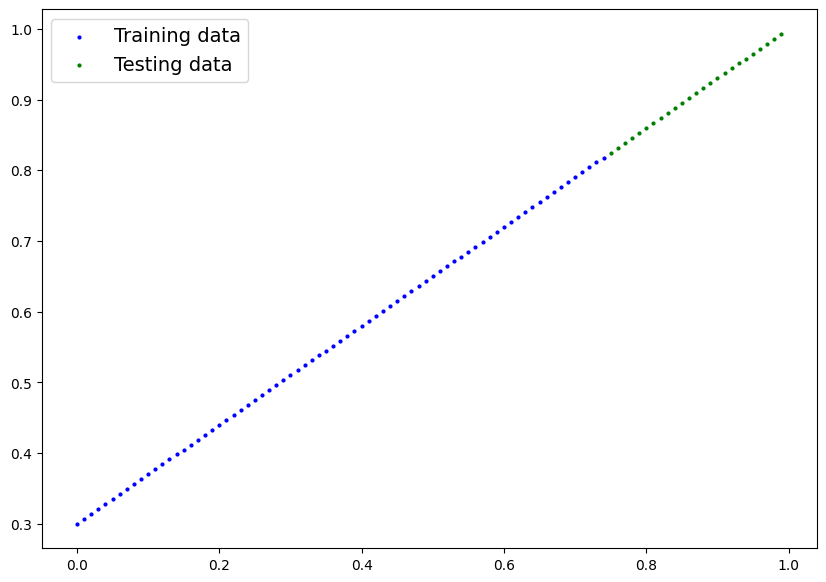

In [ ]:
plot_predictions(X_reg_train, y_reg_train, X_reg_test, y_reg_test)

In [ ]:
model2 = nn.Sequential(
    nn.Linear(1,8),
    nn.Linear(8,16),
    nn.Linear(16,1)
)
model2

Sequential(
  (0): Linear(in_features=1, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=16, bias=True)
  (2): Linear(in_features=16, out_features=1, bias=True)
)

In [ ]:
loss = nn.L1Loss()
optim = torch.optim.SGD(params = model2.parameters(), lr = 0.01)

In [ ]:
epochs = 1000
for epoch in range(epochs):

  model2.train()
  train_preds =  model2(X_reg_train)
  train_loss = loss(train_preds, y_reg_train)
  optim.zero_grad()
  train_loss.backward()
  optim.step()
  # train_acc = accuracy(y_train, train_preds)

  model2.eval()
  with torch.inference_mode():
    test_preds =  model2(X_reg_test)
    test_loss = loss(test_preds,y_reg_test)
  if epoch % 100 ==0:
    print(f'for epoch {epoch}, train_loss:{train_loss}, test_loss:{test_loss}')


for epoch 0, train_loss:0.7364094257354736, test_loss:0.9720026254653931
for epoch 100, train_loss:0.044827282428741455, test_loss:0.007508978713303804
for epoch 200, train_loss:0.03949796408414841, test_loss:0.00725275743752718
for epoch 300, train_loss:0.03336874023079872, test_loss:0.005892088636755943
for epoch 400, train_loss:0.032893165946006775, test_loss:0.007548022083938122
for epoch 500, train_loss:0.03052685409784317, test_loss:0.008272280916571617
for epoch 600, train_loss:0.03200836107134819, test_loss:0.008310206234455109
for epoch 700, train_loss:0.03053455986082554, test_loss:0.007102148607373238
for epoch 800, train_loss:0.028383130207657814, test_loss:0.007620401214808226
for epoch 900, train_loss:0.02921217307448387, test_loss:0.006615369115024805


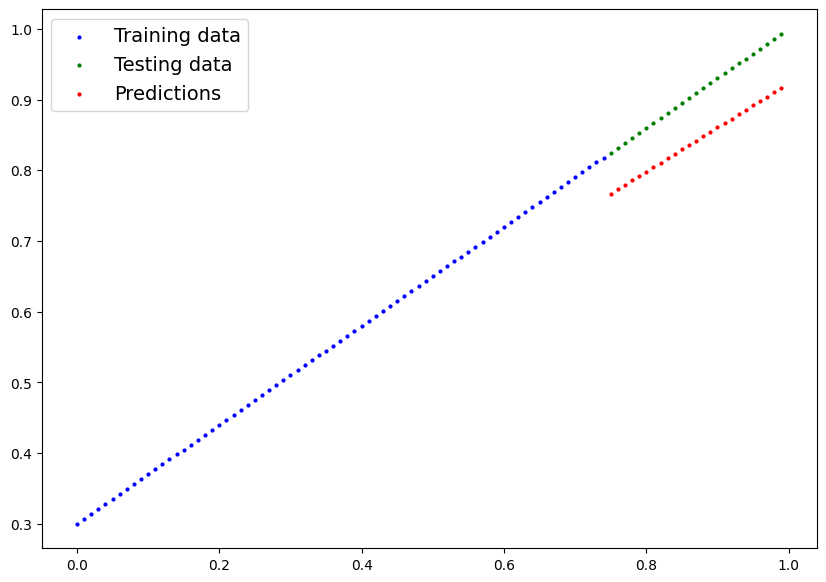

In [ ]:
model2.eval()
y_preds = []
with torch.inference_mode():
  y_pred = model2(X_reg_test)
  # y_pred = torch.round(torch.sigmoid(y_logit))
  y_preds.append(y_pred)
plot_predictions(X_reg_train,y_reg_train,X_reg_test, y_reg_test, predictions = y_preds)

We see our model has ability to fit to linear data so we will use non linear to fit to our data

In [ ]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples = 1000, noise = 0.03)



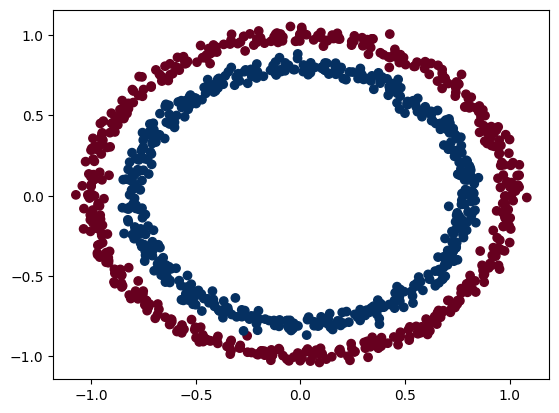

In [ ]:
plt.scatter(X[:,0], X[:,1], c= y, cmap=plt.cm.RdBu)

In [ ]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

In [ ]:
y.dtype,X.dtype

(torch.float32, torch.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
X_train.dtype

torch.float32

In [ ]:
class Circlesv3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2,8)
    self.layer2 = nn.Linear(8,16)
    self.layer3 = nn.Linear(16,1)
    self.relu = nn.ReLU()

  def forward(self,x):
    z = self.relu(self.layer1(x))
    z = self.relu(self.layer2(z))
    z = self.relu(self.layer3(z))
    return z

In [ ]:
model3 = Circlesv3()
model3

Circlesv3(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss = nn.BCEWithLogitsLoss()
optim = torch.optim.SGD(params = model3.parameters(), lr = 0.1)

In [ ]:
epochs =3000
for epoch in range(epochs):

  model3.train() # model in training mode

  train_logits = model3(X_train).squeeze()

  train_preds = torch.round(torch.sigmoid(train_logits))

  train_loss = loss(train_logits, y_train)

  optim.zero_grad()

  train_loss.backward()

  optim.step()

  train_acc = accuracy(y_train, train_preds)

  ### Test loop

  model3.eval()
  with torch.inference_mode():
    test_logits = model3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    test_loss = loss(test_logits, y_test)
    test_acc = accuracy(y_test, test_preds)

  if epoch % 100 ==0:
    print(f'the epoch :{epoch},train_loss:{train_loss}, train_acc:{train_acc}')
    print(f'test_loss:{test_loss}, test_acc:{test_acc}')
    print('\n')







the epoch :0,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :100,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :200,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :300,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :400,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :500,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :600,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :700,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :800,train_loss:0.6931473016738892, train_acc:0.5
test_loss:0.6931471824645996, test_acc:0.5


the epoch :900,train_loss:0.6931473016738892, train_acc:0

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test), len(test_preds)

(800, 800, 200, 200, 200)

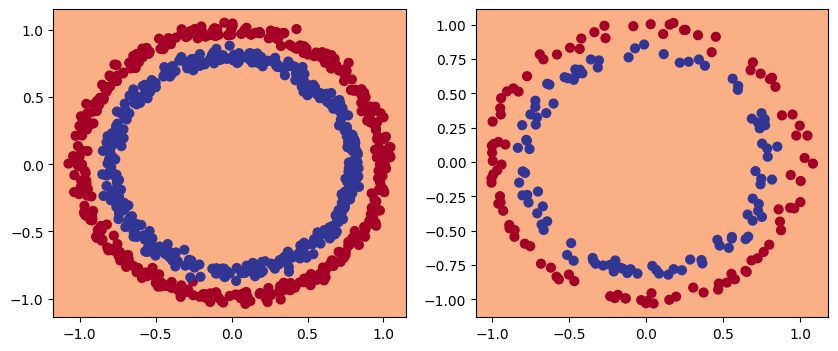

In [ ]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plot_decision_boundary(model3,X_train, y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model3,X_test,y_test)

# **Replicating Non Linear Activation functions**

In [ ]:
x = torch.arange(-5,10,1)
x = x.type(torch.float)
print(x.dtype)

torch.float32


In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors


In [ ]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))


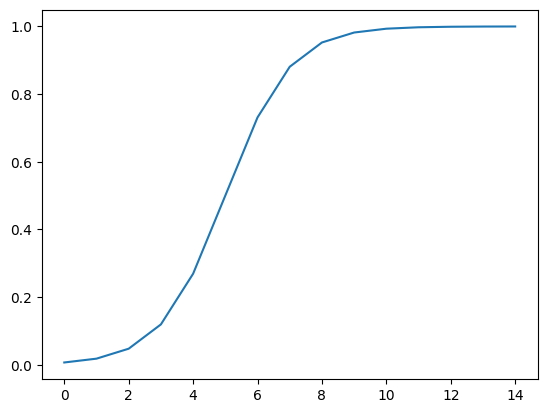

In [ ]:
plt.plot(sigmoid(x))

In [ ]:
relu(x)

tensor([0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

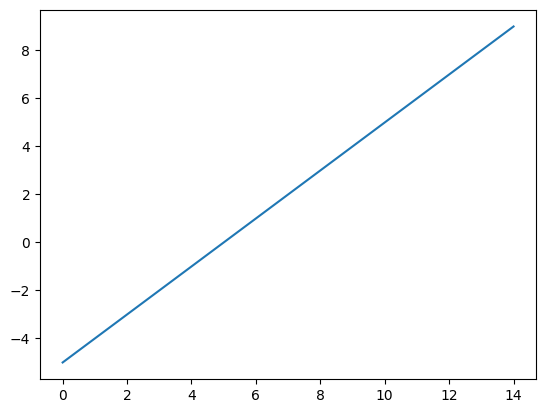

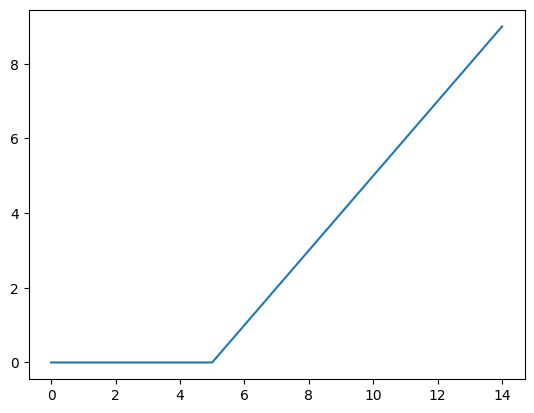

In [ ]:

plt.plot(x)
plt.figure()
plt.plot(torch.relu(x))

# **Building Pytorch Multi class model**

In [ ]:
N_SAMPLES = 1000
N_FEATURES = 2
N_CENTERS = 5
DEVIATION = 1.5


In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples = N_SAMPLES,
                 n_features = N_FEATURES,
                 cluster_std = DEVIATION,
                  centers = N_CENTERS,
                 random_state = 42)

In [ ]:
X.shape

(1000, 2)

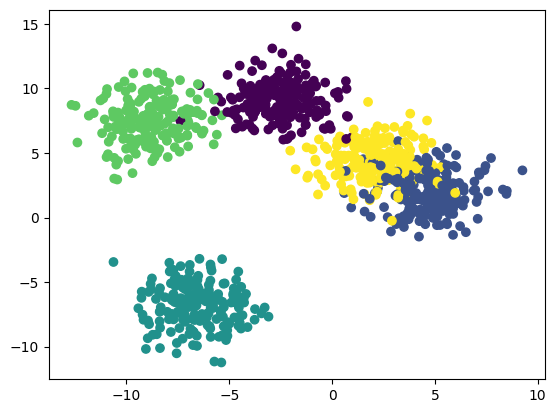

In [ ]:
plt.scatter(X[:,0], X[:,1], c = y)

In [ ]:
y.shape

(1000,)

In [ ]:
X = torch.tensor(X,dtype = torch.float)
y = torch.tensor(y, dtype = torch.long)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)


In [ ]:
X.shape[1]

2

In [ ]:
class BolbData(nn.Module):
  def __init__(self, input_shape = X.shape[1],output_shape = N_CENTERS):
    super().__init__()

    self.layer1 = nn.Linear(input_shape, 8)
    self.layer2 = nn.Linear(8,16)
    self.layer3 = nn.Linear(16,output_shape)

    self.relu = nn.ReLU()

  def forward(self,x):

    x = self.relu(self.layer1(x))
    x = self.relu(self.layer2(x))
    x = self.relu(self.layer3(x))
    return x



In [ ]:
model4 = BolbData()
model4

BolbData(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=5, bias=True)
  (relu): ReLU()
)

In [ ]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params = model4.parameters(), lr = 0.01)


In [ ]:
y_train.shape

torch.Size([800])

In [ ]:
y_train.dtype

torch.int64

In [ ]:
epochs = 400
for epoch in range(epochs):
  model4.train()

  # forward Pass
  train_logits = model4(X_train)
  # print(train_logits.shape)
  # print(train_logits[0])

  #find the prds
  train_preds = torch.softmax(train_logits, dim = 1).argmax(dim = 1)
  # print(train_preds.shape)
  # print(y_train.shape)
  # print(train_preds)
  # print(train_preds.dtype)

  # calculate the loss
  train_loss = loss(train_logits, y_train)

  # zero grad
  optim.zero_grad()

  # backward pass
  train_loss.backward()

  # optimizer step
  optim.step()

  # accuracy
  train_acc = accuracy(y_train, train_preds)

  # # # Test l0op

  model4.eval()
  # print(X_test.shape)
  test_logits = model4(X_test)
  # print(test_logits.shape)
  test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
  # print(test_preds.shape)
  test_loss = loss(test_logits, y_test)

  test_acc = accuracy(y_test, test_preds)
  # break
  if epoch % 10 == 0:
    print(f'epoch:{epoch}, train_acc:{train_acc}, train_loss :{train_loss}')
    print(f'test_loss:{test_loss}, test_acc:{test_acc}')
    print('\n')



epoch:0, train_acc:0.37125, train_loss :1.5958054065704346
test_loss:1.5349103212356567, test_acc:0.455


epoch:10, train_acc:0.5325, train_loss :1.180617094039917
test_loss:1.1373741626739502, test_acc:0.55


epoch:20, train_acc:0.71125, train_loss :0.7416063547134399
test_loss:0.656985342502594, test_acc:0.77


epoch:30, train_acc:0.7175, train_loss :0.5546610355377197
test_loss:0.48055800795555115, test_acc:0.755


epoch:40, train_acc:0.71875, train_loss :0.5238040685653687
test_loss:0.4467657208442688, test_acc:0.755


epoch:50, train_acc:0.72375, train_loss :0.5126716494560242
test_loss:0.43793416023254395, test_acc:0.755


epoch:60, train_acc:0.72625, train_loss :0.5066697597503662
test_loss:0.4334050118923187, test_acc:0.76


epoch:70, train_acc:0.72625, train_loss :0.5024959444999695
test_loss:0.4310571253299713, test_acc:0.755


epoch:80, train_acc:0.73, train_loss :0.49912819266319275
test_loss:0.4277206063270569, test_acc:0.755


epoch:90, train_acc:0.73125, train_loss :0.49

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

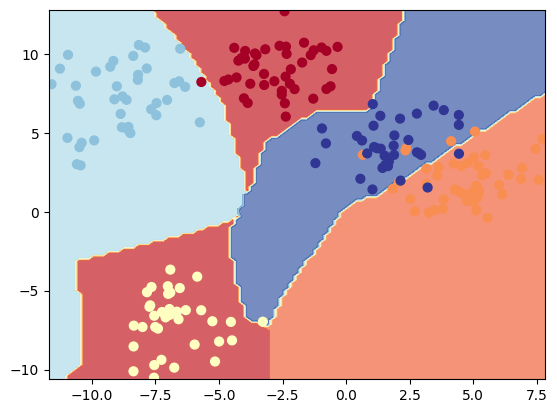

In [ ]:
plot_decision_boundary(model4, X_test, y_test)

# **Model 5 without Linear Layers**

In [ ]:
class Blogexperiment(nn.Module):
  def __init__(self, input_layers =  N_FEATURES, output_layers = N_CENTERS):
    super().__init__()
    self.layer1 = nn.Linear(input_layers, 8)
    self.layer2 = nn.Linear(8,16)
    self.layer3 = nn.Linear(16,output_layers)

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    return x




In [ ]:
model4 = Blogexperiment()
model4


Blogexperiment(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=16, bias=True)
  (layer3): Linear(in_features=16, out_features=5, bias=True)
)

In [ ]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(params = model4.parameters(), lr = 0.1)

In [ ]:
epochs = 300
for epoch in range(epochs):

  # keep the model in the training mode
  model4.train()

  train_logs = model4(X_train)
  train_preds = torch.softmax(train_logs, dim = 1).argmax(dim =1)

  train_loss = loss(train_logs, y_train)
  train_accuracy = accuracy(y_train, train_preds)

  optim.zero_grad()
  train_loss.backward()
  optim.step()

  ## testing loop
  model4.eval()
  with torch.inference_mode():
    test_logs = model4(X_test)
    test_preds = torch.softmax(test_logs, dim = 1).argmax(dim =1)
    test_loss = loss(test_logs, y_test)
    test_accuracy = accuracy(y_test, test_preds)
  if epoch%10 ==0:
    print(f'for epoch:{epoch}, training_loss: {train_loss}, test_loss:{train_accuracy}')
    print(f'testing_loss:{test_loss}, test_accuracy:{test_accuracy}')
    print('\n')





for epoch:0, training_loss: 1.1457202434539795, test_loss:0.21625
testing_loss:0.9359610080718994, test_accuracy:0.565


for epoch:10, training_loss: 0.2611452341079712, test_loss:0.8925
testing_loss:0.25795912742614746, test_accuracy:0.915


for epoch:20, training_loss: 0.2065691202878952, test_loss:0.9275
testing_loss:0.1926306188106537, test_accuracy:0.945


for epoch:30, training_loss: 0.17246517539024353, test_loss:0.9325
testing_loss:0.1384086012840271, test_accuracy:0.94


for epoch:40, training_loss: 0.1633686125278473, test_loss:0.94125
testing_loss:0.1218334510922432, test_accuracy:0.955


for epoch:50, training_loss: 0.15881183743476868, test_loss:0.9375
testing_loss:0.12786263227462769, test_accuracy:0.94


for epoch:60, training_loss: 0.15686391294002533, test_loss:0.93875
testing_loss:0.12436675280332565, test_accuracy:0.95


for epoch:70, training_loss: 0.15620265901088715, test_loss:0.94
testing_loss:0.12249328941106796, test_accuracy:0.95


for epoch:80, training_loss:

In [ ]:
plot_decision_boundary(model4, X_train, y_train)

NameError: name 'plot_decision_boundary' is not defined